# Fourier Series Notebook
author: Kevin Kim

date: 2/22/2021

description: A notebook with a basic demonstration of taking Fourier Series

In [8]:
import scipy.integrate as integrate
import numpy as np
import math
import matplotlib.pyplot as plt

$\int_{-\pi}^{\pi}f(x)\, dx=\int_{-\pi}^{\pi}\frac{A_0}{2}\, dx+
\sum_{n=1}^{\infty}\left\{A_n\int_{-\pi}^{\pi}\cos(nx)\, dx+B_n\int_{-\pi}^{\pi}\sin(nx)\, dx\right\}$
is fourier series of f(x) over $\-pi$ to $\pi$

where

$$
A_0=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\, dx.
$$

\begin{equation}
B_m=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(mx)\, dx \qquad m=1, 2, 3, \dots. \label{Bs}
\end{equation}

\begin{equation}
A_m=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(mx)\, dx \qquad m=0, 1, 2, \dots.\label{As}
\end{equation}

Alternate defn:

given a function $$f(x)$$ with spatial period $$T = \frac{2\pi}{\lambda}$$ where $\lambda$ is the wavelength of the function

Code to calculate $f(x) * cos(mkx)$ where $k = 2\pi/\lambda$

Note that in the code, we are calculating fourier series over the bound __$(0, \lambda)$__ (not $(-\lambda, \lambda)$ like shown in the representation above). 



There is a 2 in front of the expression $k = 2\pi/\lambda$ because

$$\int_{-\lambda}^{\lambda}f(x)\, dx = 2\int_{0}^{\lambda}f(x)\, dx$$


In [9]:
def an(x,n,lam, func):

	k = 2*math.pi / lam
	return func(x) * math.cos(n*k*x)

def bn(x,n,lam,func):

	k = 2*math.pi / lam
	return func(x) * math.sin(n*k*x)

In [10]:
def fourierSeries(n,lam, xval,func):
	origx = xval
	X = np.zeros(np.shape(xval))
	k = 2*math.pi / lam
	A0 = 2/lam * integrate.quad(func, 0, lam)[0]
	for i in range(1,n):
		A_n = 2/lam * integrate.quad(an, 0 ,lam, args=(i,lam, func))[0]
		B_n = 2/lam * integrate.quad(bn, 0 ,lam, args=(i,lam,func))[0]
		X = np.cos(origx * k * i) * A_n + np.sin(origx *k *i) * B_n + X
	return X + A0/2	

Fourier Series driver function below

In [11]:
def runFourier(n, wavelength, x_start, x_end, func):
	xval = np.linspace(x_start, x_end, 10000)
	yfourier = fourierSeries(n, wavelength, xval,func)
	yanalytic = func(xval)
	fig, ax= plt.subplots()
	ax.plot(xval, yfourier, label="fourier")
	ax.set(xlabel='x', ylabel='y',
	       title='Fourier Series of y=x^2')
	ax.plot(xval, yanalytic,label="analytic")

	ax.grid()
	ax.legend()


	plt.show()

/home/kevin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys
/home/kevin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  o

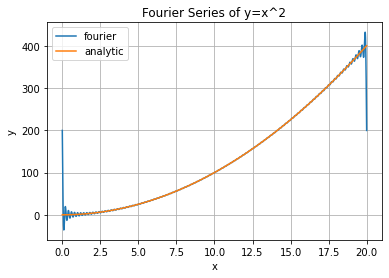

In [12]:
runFourier(100, 20, 0, 20, lambda x: x**2)
